## 1  Regularization. 
Using the accompanying Hitters dataset, we will explore
regression models to predict a player's Salary from other variables. You must
python.
https://gist.github.com/keeganhines/59974f1ebef97bbaa44fb19143f90bad

## 1.1
Use LASSO regression to predict Salary from the other numeric predictors.
Create a visualization of the coefficient trajectories. Comment on which are the
final three predictors that remain in the model. Use cross-validation to find the
optimal value of the regularization penality. How many predictors are left in
that model?

In [1]:
##Install Packages 
import pandas as pd
import numpy as np
from itertools import cycle
import matplotlib.pyplot as plt

from sklearn.linear_model import Lasso
from sklearn.preprocessing import scale 
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV

In [2]:
##Read data
hit = pd.read_csv('Hitters.csv')
##Reanme first col name to name 
hit.rename( columns={'Unnamed: 0':'name'}, inplace=True)

In [3]:
##To show all cols 
pd.set_option('display.max_columns', None)
#hit

In [4]:
##Check cols datatype
#hit.dtypes

In [5]:
##drop non-numeric cols for fitting the model
hitL = hit.drop(columns = ['name','League','Division','NewLeague'])

In [6]:
##check missing values 
hitL.isna().sum()

AtBat       0
Hits        0
HmRun       0
Runs        0
RBI         0
Walks       0
Years       0
CAtBat      0
CHits       0
CHmRun      0
CRuns       0
CRBI        0
CWalks      0
PutOuts     0
Assists     0
Errors      0
Salary     59
dtype: int64

In [7]:
##drop the rows that dont have Salary which is the Y 
hitL = hitL.dropna()
hitL

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
317,497,127,7,65,48,37,5,2703,806,32,379,311,138,325,9,3,700.0
318,492,136,5,76,50,94,12,5511,1511,39,897,451,875,313,381,20,875.0
319,475,126,3,61,43,52,6,1700,433,7,217,93,146,37,113,7,385.0
320,573,144,9,85,60,78,8,3198,857,97,470,420,332,1314,131,12,960.0


In [8]:
#check the general data 
#hitL.describe(include = 'all')

In [9]:
##Identify X and y 
y = hitL.Salary
X = hitL.drop(['Salary'], axis = 1).astype('float64')

In [10]:
##Set lamda values as alphas 
alphas = 10**np.linspace(10,-4,100)*0.5

Text(0.5, 1.0, 'Lasso Coefficient Trajectories')

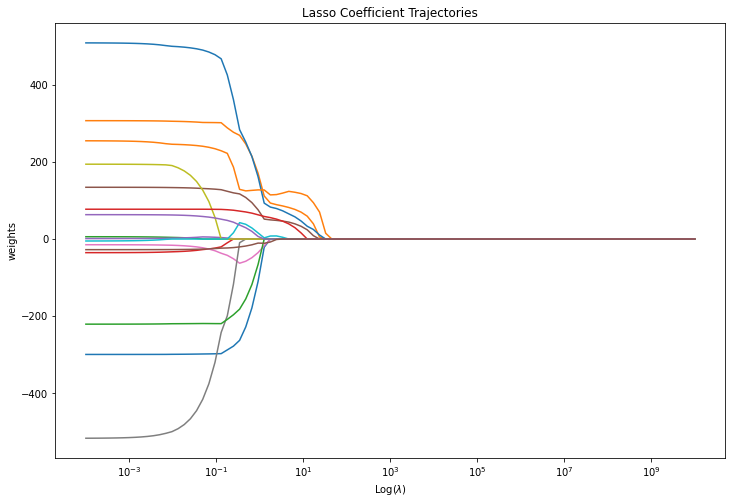

In [11]:
##Use Lasso coefficient trajectories visualization to determine the alpha
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state=26)
lasso = Lasso(max_iter = 10000, normalize = True)
coefs = []

plt.figure(figsize = (12,8))

for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(scale(X_train), y_train)
    coefs.append(lasso.coef_)

ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('weights')
plt.title('Lasso Coefficient Trajectories')

In [12]:
##according to the plot above, alpha = 10 should be large enough to diminish the number of parameter to 3
model = Lasso(alpha=10, normalize = True)
lassoModel = model.fit(X,y)
print(pd.Series(lassoModel.coef_, index = X.columns))

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64


#### The final three predictors that remain in the model are Hits, CRuns, and CRBI

In [13]:
##Lasso cross-validation
lasso_cv = LassoCV(alphas = None, cv = 10, normalize = True)
lasso_cv.fit(X, y)
lasso_cv.alpha_


lasso.set_params(alpha=lasso_cv.alpha_)
lasso.fit(X,y)

print(lasso_cv.alpha_)

0.0635481759985745


#### The optimal value of the regularization penality is 0.0635

In [14]:
pd.Series(lasso.coef_, index=X.columns)

AtBat     -2.082954
Hits       7.041011
HmRun      0.000000
Runs      -0.682615
RBI        0.496552
Walks      5.511781
Years     -6.107625
CAtBat    -0.087066
CHits      0.000000
CHmRun     0.156468
CRuns      1.228061
CRBI       0.583821
CWalks    -0.690601
PutOuts    0.292694
Assists    0.304372
Errors    -2.450795
dtype: float64

#### There are 14 parameter left: AtBat, Hits, Runs, RBI, Walks, Years, CAtBat, CHmRun, CRuns, CRBI, CWalks, PutOuts, Assists, Errors

## 1.2
Repeat with Ridge Regression. Visualize coeffecient trajectories. Use cross-
validation to find the optimal vaule of the regularization penalty.

Text(0.5, 1.0, 'Ridge Coefficient Trajectories')

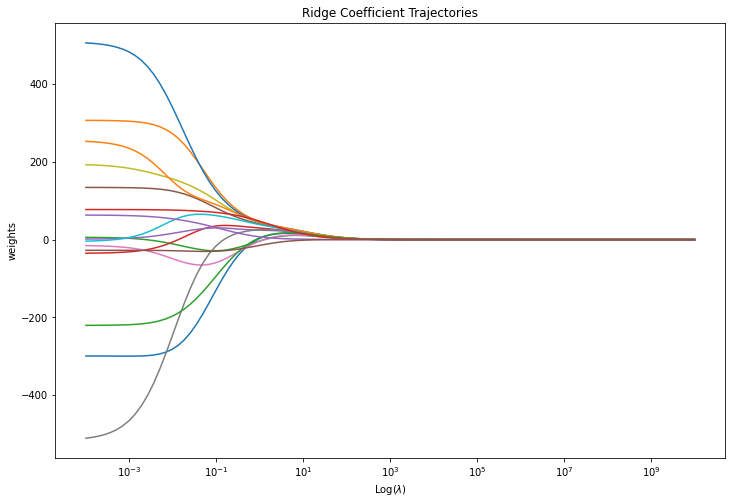

In [15]:
##Ridge coefficient trajectories
ridge = Ridge(max_iter = 10000, normalize = True)
coefs = []

plt.figure(figsize = (12,8))

for a in alphas:
    ridge.set_params(alpha=a)
    ridge.fit(scale(X_train), y_train)
    coefs.append(ridge.coef_)
    
ax = plt.gca()
ax.plot(alphas*2, coefs)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Log($\\lambda$)')
plt.ylabel('weights')
plt.title('Ridge Coefficient Trajectories')

In [16]:
#Ridge cross validation 
ridgecv = RidgeCV(alphas = alphas)
ridgecv.fit(scale(X), y)

ridge.set_params(alpha=ridgecv.alpha_)
ridge.fit(scale(X), y)

print(ridgecv.alpha_)

3.2140365586421598


In [17]:
pd.Series(ridge.coef_, index=X.columns)

AtBat      15.918306
Hits       22.501912
HmRun      11.301111
Runs       19.726052
RBI        19.198650
Walks      22.440963
Years      13.403145
CAtBat     21.477842
CHits      24.354807
CHmRun     22.565505
CRuns      24.991297
CRBI       25.183204
CWalks     18.518114
PutOuts    22.252904
Assists     1.626375
Errors     -2.012647
dtype: float64

#### The optimal value of the regularization penality is 3.214

## 2
Short Answer. Explain in your own words the bias-variance tradeoff. What
role does regularization play in this tradeoff? Make reference to your findings
in number (1) to describe models of high/low bias and variance.

#### Without regularization, the regression model will just be a least squares regression model, under the assumption the relationship between the response and the predictors is close to linear, the least squares estimates will have low bias but may have high variance. This means that a small change in the training data can cause a large change in the least squares coefficient estimates. With regularization, Lasso regression can reduce the number of predictors that will increaes the bias and decreace the variances; Ridge regression seeks coecient estimates that fit the data well by making the RSS small and decreasee the variances as well.